In [1]:
import pandas as pd
import numpy as np
import os

# Problem #1

In [2]:
# list datasets
os.listdir('/home/stella/Desktop/MachineLearningCVE/')

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

# Problem #2

In [3]:
# function to trim trailing whitespace left & right of column names
def trim_spaces(df):
    columns = df.columns
    new_columns = []
    for col in columns:
        temp = col.strip()
        new_columns.append(temp)
    df.columns = new_columns

In [4]:
# load the first dataset: Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
df1 = pd.read_csv('/home/stella/Desktop/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [5]:
print(f'shape: {df1.shape}')

shape: (225745, 79)


In [6]:
# clean up column names
trim_spaces(df1)

In [7]:
# 78 features & label column
df1.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [8]:
# observe
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
# check class labels
df1['Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

# Problem #3

The dependent variable is the 'Label' column which contains the class of each instance in the dataset as either *BENIGN* or *DDoS*. Therefore, the machine learning methodology we would have to use is a **classification** algorithm.

Since we are dealing with binary class labels, in this case I suggest utilizing logistic regression as the argmax output will be either 0 or 1. This is a nice representation of the predicted class labels that we are trying to achieve.

# Problem #4

In [10]:
# function to binarize the class labels
def binarize(x):
    if x == 'BENIGN':
        return 0
    else:
        return 1

In [11]:
# binarize class labels
df1['Label'] = df1['Label'].apply(binarize)

In [12]:
# check class balance
class_counts = df1['Label'].value_counts()
print(class_counts)

1    128027
0     97718
Name: Label, dtype: int64


In [13]:
print(f'BENIGN %: {round(class_counts[1] / df1.shape[0] * 100, 2)}')
print(f'DDoS %: {100 - round(class_counts[1] / df1.shape[0] * 100, 2)}')

BENIGN %: 56.71
DDoS %: 43.29


Above we see that majority of instances are labeled *BENIGN*. However, looking at the percentages, we can consider this to be an adequately balanced dataset.

# Problem #5

In [14]:
pd.options.display.max_rows = 100

In [15]:
# check features for null values & any infinites as we are dealing with numerical data
# even after applying .dropna(), infinity values still persist. Hence, we need to utilize .drop() shown below.
nulls = df1.isin([-1*np.inf, np.inf, None]).sum()
for i in range(len(nulls)):
    if nulls[i] > 0:
        print(f'{nulls.index[i]}: {nulls[i]} nulls')

Flow Bytes/s: 34 nulls
Flow Packets/s: 34 nulls


In [16]:
# drop NaN
df1.dropna(axis=0, inplace=True)

# drop infinity
inf_indices = df1[(df1['Flow Packets/s'] == np.inf)].index
df1.drop(inf_indices, inplace=True)

In [17]:
# observe number of unique 'Destination Ports'
n_ports = len(df1['Destination Port'].unique())
print(f'Number of Unique Ports: {n_ports}')

Number of Unique Ports: 23944


In [18]:
# These are the top 20 ports based on their counts. After this, the counts for other ports drop to single digits.
common_ports_counts = df1['Destination Port'].value_counts()[:30]

In [19]:
common_ports_counts

80       136946
53        31950
443       13480
8080        510
123         362
22          342
137         274
389         259
88          173
21          167
465         147
139         100
3268         91
0            54
138          53
445          48
135          23
49666        23
5353         16
49671        12
55200         8
59871         8
57844         8
55202         8
53675         8
55706         7
58135         7
58130         7
56873         7
61012         7
Name: Destination Port, dtype: int64

In [20]:
common_ports = list(common_ports_counts.index)

In [21]:
# Observe the common ports we will be using. Other ports will be renamed to 'other_ports'
a, b, c, d, e = 0, 1, 2, 3, 4
for i in range(4):
    print(common_ports[a], common_ports[b], common_ports[c], common_ports[d], common_ports[e], sep='\t')
    a +=5
    b += 5
    c += 5
    d += 5
    e += 5

80	53	443	8080	123
22	137	389	88	21
465	139	3268	0	138
445	135	49666	5353	49671


**Reference**: https://hostpapasupport.com/commonly-used-ports/

We see that popular prots are 80, 22, 21, 443 which are some of most frequent in our datset. Upon further research, we will not use port 0 as it is not an official port. Also, we will not use  the last 3 ports shown as they are uncommon. Therefore we will use 16/20 of the ports shown above. The other ports will be renamed 'other_ports'.

In [22]:
# update common ports
bad = [0, 49666, 5353, 49671]
common_ports = [str(i) for i in common_ports[:20] if i not in bad]

In [23]:
common_ports

['80',
 '53',
 '443',
 '8080',
 '123',
 '22',
 '137',
 '389',
 '88',
 '21',
 '465',
 '139',
 '3268',
 '138',
 '445',
 '135']

In [24]:
# create port dictionary
port_names = {'80': 'HTTP',
              '53': 'DNS',
              '443': 'HTTP_OVER_SSL',
              '8080': 'HHTP_PROXY',
              '123': 'NETBUS',
              '22': 'SSH/SCP',
              '137': 'NetBIOS_A',
              '389': 'LDAP_A',
              '88': 'KERBEROS',
              '21': 'FTP',
              '465': 'SMT_OVER_SSL',
              '139': 'NetBIOS_B',
              '3268': 'LDAP_B',
              '138': 'NetBIOS_C',
              '445': 'Microsoft DS',
              '135': 'Microsoft RPC',
             }

In [25]:
# function to convert ports to string
def str_port(x):
    return str(x)

In [26]:
def rename(x):
    if x in port_names.keys():
        return x
    else:
        return 'other_ports'

In [27]:
# convert port numbers to string
df1['Destination Port'] = df1['Destination Port'].apply(str_port)

In [28]:
# rename unpopular ports to 'other_ports'
df1['Destination Port'] = df1['Destination Port'].apply(rename)

In [29]:
df1['Destination Port'].value_counts()

80             136946
other_ports     40786
53              31950
443             13480
8080              510
123               362
22                342
137               274
389               259
88                173
21                167
465               147
139               100
3268               91
138                53
445                48
135                23
Name: Destination Port, dtype: int64

**Note**: We will one-hot-encode the ports feature and standardize the remaining features after plotting the histograms for convenience

# Problem #6

In [30]:
import matplotlib.pyplot as plt

**Note**: For the histograms displayed, the ranges had to be restricted as counts are highly skewed

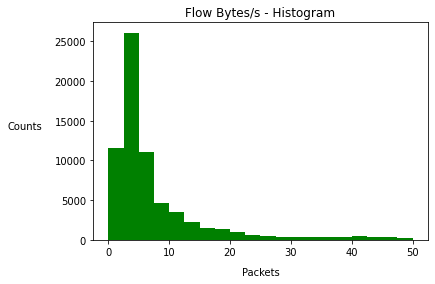

In [31]:
plt.hist(df1['Flow Bytes/s'], bins=20, range=(0,50), rwidth=5, color='g')
plt.title('Flow Bytes/s - Histogram')
plt.xlabel('Packets', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.show()

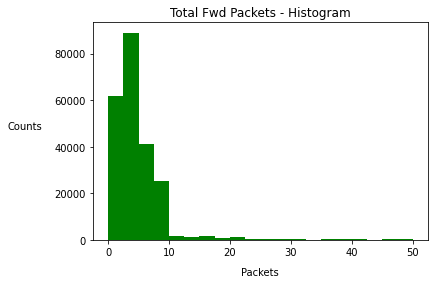

In [32]:
plt.hist(df1['Total Fwd Packets'], bins=20, range=(0,50), rwidth=5, color='g')
plt.title('Total Fwd Packets - Histogram')
plt.xlabel('Packets', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.show()

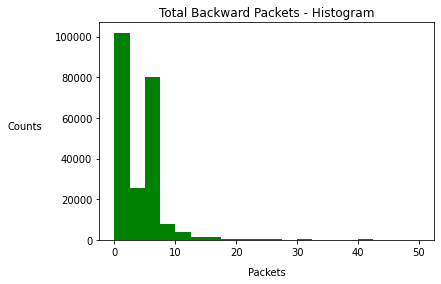

In [33]:
plt.hist(df1['Total Backward Packets'], bins=20, range=(0,50), rwidth=5, color='g')
plt.title('Total Backward Packets - Histogram')
plt.xlabel('Packets', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.show()

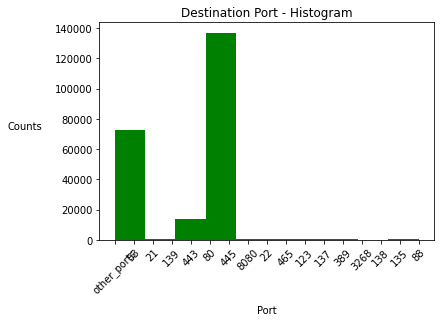

In [34]:
plt.hist(df1['Destination Port'], color='g')
plt.title('Destination Port - Histogram')
plt.xlabel('Port', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.xticks(rotation=45)
plt.show()

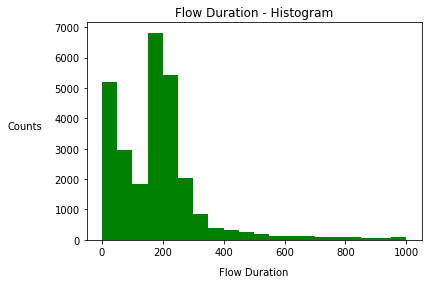

In [35]:
plt.hist(df1['Flow Duration'], bins=20, range=(0,1000), rwidth=5, color='g')
plt.title('Flow Duration - Histogram')
plt.xlabel('Flow Duration', labelpad=10)
plt.ylabel('Counts', rotation='horizontal', labelpad=30)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
# one hot encode 'Destination Port'
one_hot_df = pd.get_dummies(df1['Destination Port'], drop_first=True)
one_hot_df.head()

,135,137,138,139,21,22,3268,389,443,445,465,53,80,8080,88,other_ports
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
# save labels column
df1_labels = df1.iloc[:,-1]

# save column names
one_hot_cols = list(one_hot_df.columns)
df1_columns = list(df1.columns)[1:]

In [39]:
# drop 'Destination Port' for the one_hot_encoded features
df1.drop(['Destination Port'], axis=1, inplace=True)

In [40]:
# standardize numerical features
scaler = StandardScaler()
df1_scaled = pd.DataFrame(scaler.fit_transform(df1.iloc[:,0:-1]), columns=list(df1.columns)[:-1])

In [41]:
# concatenate one_hot_encoded features, standardized features, labels
df1 = pd.concat([one_hot_df, df1_scaled], axis=1, ignore_index=True)
df1 = pd.concat([df1, df1_labels], axis=1, ignore_index=True)

df1_cols = one_hot_cols + df1_columns
df1.columns = df1_cols

In [42]:
# sanity check
display(df1.head())
df1.dropna(axis=0, inplace=True)
df1.shape

,135,137,138,139,21,22,3268,389,443,445,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.355799,-0.231652,-0.061517,-0.231164,-0.226499,-0.472388,-0.28316,-0.478408,-0.391105,0.0


(225677, 94)

# Problem #7

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [44]:
# list of models
models = [GaussianNB(), LogisticRegression(max_iter=200, n_jobs=-2), DecisionTreeClassifier(max_depth=35)]

In [45]:
def run_models(df, models):
    kfold = KFold(n_splits=10)
    
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    
    for model in models:
        scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', n_jobs=-2)
        print(model)
        print(f'Accuracy Scores: {scores}\n')

In [46]:
run_models(df1, models)

GaussianNB()
Accuracy Scores: [0.98130096 0.99725275 0.99645516 0.99676533 0.9974743  0.99694257
 0.99481567 0.99499269 0.98706075 0.97164001]

LogisticRegression(max_iter=200, n_jobs=-2)
Accuracy Scores: [0.9886565  0.99822758 0.99840482 0.99800603 0.99796172 0.99871499
 0.9974743  0.99742988 0.99153631 0.98683919]

DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [0.99805034 0.99937965 0.99973414 0.99884793 0.99836051 0.99960121
 0.99898086 0.99924669 0.99898081 0.99534719]



# Problem #8

In [47]:
remaining_datasets = os.listdir('../../../Desktop/MachineLearningCVE/')
display(remaining_datasets)

['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'Monday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'Tuesday-WorkingHours.pcap_ISCX.csv',
 'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'Wednesday-workingHours.pcap_ISCX.csv']

In [48]:
def read_data(datasets):
    prefix = '~/Desktop/MachineLearningCVE/'
    dataframes = []
    
    for i in datasets:
        path = prefix + i
        df = pd.read_csv(path)
        dataframes.append(df)
    
    return dataframes

In [49]:
def preprocess(_df):
    # remove trailing white space from feature column names
    df = _df.copy()
    trim_spaces(df)

    # binarize class labels
    df['Label'] = df['Label'].apply(binarize)
    
    # remove null values
    df.dropna(axis=0, inplace=True)
    
    # drop infinity
    inf_indices = df[(df['Flow Packets/s'] == np.inf)].index
    df.drop(inf_indices, inplace=True)
    
    # convert port numbers to string
    df['Destination Port'] = df['Destination Port'].apply(str_port)
    
    # rename unpopular ports to 'other_ports'
    df['Destination Port'] = df['Destination Port'].apply(rename)
    
    # one hot encode 'Destination Port'
    one_hot_df = pd.get_dummies(df['Destination Port'], drop_first=True)
    
    # save labels column
    df_labels = df.iloc[:,-1]
    
    # save column names
    one_hot_cols = list(one_hot_df.columns)
    df_columns = list(df.columns)[1:]
    
    # drop 'Destination Port' for the one_hot_encoded features
    df.drop(['Destination Port'], axis=1, inplace=True)
    
    # standardize numerical features
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:,0:-1]), columns=list(df.columns)[:-1])
    
    # concatenate one_hot_encoded features, standardized features, labels
    df = pd.concat([one_hot_df, df_scaled], axis=1, ignore_index=True)
    df = pd.concat([df, df_labels], axis=1, ignore_index=True)
    
    df_cols = one_hot_cols + df1_columns
    df.columns = df1_cols
    
    # sanity check
    df.dropna(axis=0, inplace=True)
    
    return df

In [50]:
# read in remaining datasets
dataframes = read_data(remaining_datasets[1:])

In [51]:
# preprocess dataframes
final_dataframes = [preprocess(i) for i in dataframes]

In [52]:
# observe labels of dataset 2 through 8
# note that dataset 3 (2nd one shown below) only has 1 class label
names = [2,3,4,5,6,7,8]

for i in range(len(final_dataframes)):
    print(f'Dataset {names[i]} Labels')
    print(final_dataframes[i].iloc[:,-1].value_counts(),'\n')

Dataset 2 Labels
0.0    188842
1.0      1947
Name: Label, dtype: int64 

Dataset 3 Labels
0.0    529044
Name: Label, dtype: int64 

Dataset 4 Labels
0.0    167916
1.0      2180
Name: Label, dtype: int64 

Dataset 5 Labels
1.0    158804
0.0    126922
Name: Label, dtype: int64 

Dataset 6 Labels
0.0    431555
1.0     13826
Name: Label, dtype: int64 

Dataset 7 Labels
0.0    288152
1.0        36
Name: Label, dtype: int64 

Dataset 8 Labels
0.0    438446
1.0    251663
Name: Label, dtype: int64 



# Problem #9

I will apply the **Decision Tree** classifier to the remaining datasets

In [53]:
# let's apply a max depth for the decision tree to better generalize and faster learning

In [54]:
# list of models
models2 = [DecisionTreeClassifier(max_depth=35)]

In [55]:
# run decision tree on datasets 2 through 8
for dataset in range(len(final_dataframes)):
    print(f'Dataset {names[dataset]}')
    run_models(final_dataframes[dataset], models2)

Dataset 2
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [0.99669794 0.99685518 0.99585932 0.99114209 0.99108968 0.97405524
 0.99145658 0.99633104 0.99528277 0.99612119]

Dataset 3
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Dataset 4
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [0.98677249 0.96049383 0.9600823  0.97031158 0.96072898 0.98412698
 0.98959374 0.9875948  0.99188665 0.98959374]

Dataset 5
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [0.945543   0.94298814 0.93973331 0.98152102 0.98313093 0.95723235
 0.97788044 0.96157077 0.88957721 0.88583228]

Dataset 6
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [0.97893981 0.98284611 0.98801024 0.98704477 0.96977862 0.99324173
 0.99681171 0.99660964 0.99613813 0.99645247]

Dataset 7
DecisionTreeClassifier(max_depth=35)
Accuracy Scores: [1.         0.9998265  0.99947951 0.9998265  0.9998612  0.99961831
 0.9997571  0.9997571  0.9999653  0.9998959 ]

Dataset 8
Dec

Above we see that dataset 3 has 100% accuracy for each fold due to that fact that there is only 1 class label present in the dataset. Regardless of the independent features, the predicted will always be *BENIGN* based on the training data. Overall, the decision tree ran pretty well on all of the other datasets from the high 80-99% accuracy range.

## K-Means For Dataset #3

In [56]:
from sklearn.cluster import KMeans

In [57]:
df3 = final_dataframes[1].drop(['Label'], axis=1)
df3.head()

,135,137,138,139,21,22,3268,389,443,445,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007532,0.00658,-0.116587,-0.10887,-0.141407,-0.087755,-0.267178,-0.093323,-0.270187,-0.257263
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007532,0.00658,-0.116587,-0.10887,-0.141407,-0.087755,-0.267178,-0.093323,-0.270187,-0.257263
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007532,0.00658,-0.116587,-0.10887,-0.141407,-0.087755,-0.267178,-0.093323,-0.270187,-0.257263
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007532,0.00658,-0.116587,-0.10887,-0.141407,-0.087755,-0.267178,-0.093323,-0.270187,-0.257263
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.007532,0.00658,-0.116587,-0.10887,-0.141407,-0.087755,-0.267178,-0.093323,-0.270187,-0.257263


In [58]:
clusters = [1,2,3,4,5,6,7,8,9,10]
predictions = []
scores = []

for i in clusters:
    # train
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df3.values)
    
    # predict
    pred = model.predict(df3.values)
    
    # observe score
    score = model.score(df3.values)
    
    predictions.append(pred)
    scores.append(-1 * score)

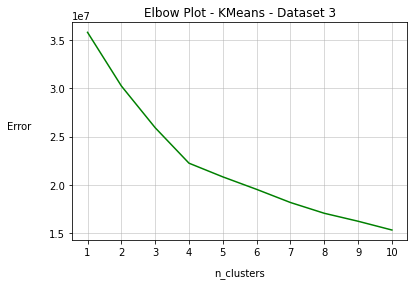

In [59]:
# elbow plot
plt.plot(clusters, scores, color='g')
plt.grid(True, alpha=0.6)
plt.title('Elbow Plot - KMeans - Dataset 3')
plt.xlabel('n_clusters', labelpad=10)
plt.ylabel('Error', labelpad=30, rotation='horizontal')
plt.xticks(range(1,11))
plt.show()

Since dataset 3 has a sinlge class label, I decided to utilize unsupervised KMeans approach. Training on various number of clusters, we can see in the elbow plot that there is most likely 4 different class labels for this dataset. In the previous datasets, we had binary labels as either *BENIGN* or not. However, this was because we had binarize the labels ourselves.

Upon manual inspection of the raw dataset, some datasets has *BENIGN* along with multiple classes of cybersecurity threats. Thus, in utilziing KMeans, sticking to 2 clusters would not be sufficient as the feature space would not allow for a clean grouping of data points to only 2 clusters. In dataset 3, most likely there is the class *BENIGN* and 3 other types of security threats.

# Problem #10

The hardest part I would imagine would be understanding the important values of certain features as I am not a subject matter expert. In this case, needing to know the important Destination Ports in order to simplify the feature would be something only a subject matter expert would know. Not knowing how to filter out bad values and simplifying the dataset can lead to more complicated training and hidner model generalizability.

Of course, we can always observe correlation heatmaps to see how specific features correlate with the label feature to gain better insight. Also, perhaps some values are a clear indicator of a cybersecurity  intrusion such as 'Flow Bytes/s' = infinity. Since these appeared only 34 times in dataset 1, they were simply removed since infinity was treated as NaN. But again, this is something only a SME would know.

Where we lack domain knowledge, we can make it up with statistical analysis of the features and the predicted variables as mentioned above. Then, after filtering for a robust dataset based on our hypothesis, we can apply our machine learning models and observe their performances.